### 1. Data Load

In [5]:
import pandas as pd

In [6]:
# parse_dates 속성은 object 타입을 datetime64 타입으로 변환해주는 역할을 한다.

train = pd.read_csv('data/bike/train.csv', parse_dates=['datetime'])
# 여기에 parse_dates = ['datetime'] 이라는 옵션이 있어야 datetime 년도-월-일-시-분-초-요일 로 읽혀짐
# datetime 년도-월-일-시-분-초-요일 따로따로 각각 읽는건 코드를 더 쳐야 함!

# 대여일시, 반납일시 coulmn의 type을 datetime 타입으로 바꾸기!
# df['대여일시'] = pd.to_datetime(df['대여일시'])

# 이렇게 바꿔줘도 됨!

print(train.shape)
print(train.columns)
print(train.info())
train.head()

(10886, 12)
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
test = pd.read_csv('data/bike/test.csv', parse_dates=['datetime'])
print(test.shape)
print(test.columns)
print(test.info())
test.head()

(6493, 9)
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.6 KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
train.groupby('season')['count'].count()

# train.groupby('season')['season'].count() 이렇게 해도 됨

season
1    2686
2    2733
3    2733
4    2734
Name: count, dtype: int64

In [9]:
def mycount(df,col_name):
    return df.groupby(col_name)[col_name].count()

In [10]:
print(mycount(train, 'season'))
print(mycount(test, 'season'))

season
1    2686
2    2733
3    2733
4    2734
Name: season, dtype: int64
season
1    1556
2    1676
3    1763
4    1498
Name: season, dtype: int64


In [11]:
print(mycount(train, 'holiday'))
print(mycount(test, 'holiday'))

holiday
0    10575
1      311
Name: holiday, dtype: int64
holiday
0    6304
1     189
Name: holiday, dtype: int64


In [12]:
print(mycount(train, 'workingday'))
print(mycount(test, 'workingday'))

workingday
0    3474
1    7412
Name: workingday, dtype: int64
workingday
0    2040
1    4453
Name: workingday, dtype: int64


In [13]:
print(mycount(train, 'weather'))
print(mycount(test, 'weather'))

weather
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
weather
1    4221
2    1710
3     560
4       2
Name: weather, dtype: int64


In [14]:
print(mycount(train, 'windspeed'))
print(mycount(test, 'windspeed'))

windspeed
0.0000     1313
6.0032      872
7.0015     1034
8.9981     1120
11.0014    1057
12.9980    1042
15.0013     961
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
36.9974      22
39.0007      27
40.9973      11
43.0006      12
43.9989       8
46.0022       3
47.9988       2
50.0021       1
51.9987       1
56.9969       2
Name: windspeed, dtype: int64
windspeed
0.0000     867
6.0032     553
7.0015     583
8.9981     618
11.0014    638
12.9980    615
15.0013    552
16.9979    471
19.0012    372
19.9995    316
22.0028    230
23.9994    186
26.0027    146
27.9993    109
30.0026     65
31.0009     57
32.9975     32
35.0008     26
36.9974     17
39.0007     17
40.9973     12
43.0006      2
43.9989      3
46.0022      2
50.0021      1
54.0020      2
55.9986      1
Name: windspeed, dtype: int64


In [15]:
print(mycount(train, 'humidity'))
print(mycount(test, 'humidity'))

humidity
0       22
8        1
10       1
12       1
13       1
14       2
15       4
16       8
17       6
18       7
19      15
20      10
21      16
22      18
23      37
24      37
25      32
26      39
27      49
28      61
29      65
30      60
31      80
32      64
33     104
34      93
35     107
36     129
37     149
38     127
      ... 
68     131
69     207
70     259
71     107
72     136
73     195
74     197
75     113
76     144
77     244
78     192
79     149
80      60
81     174
82     200
83     316
84      75
85       4
86      40
87     289
88     368
89     150
90       4
91       1
92       2
93     205
94     324
96       1
97       1
100    148
Name: humidity, Length: 89, dtype: int64
humidity
16       2
17       4
18       3
19       1
20       7
21      10
22       9
23       9
24      19
25      27
26      39
27      22
28      36
29      41
30      53
31      38
32      35
33      58
34      40
35      56
36      58
37      75
38      59
39      83
40    

### 2. Data Preprocessing 

In [16]:
# datetime 칼럼을 년/월/일/시/분/초/요일까지 나누기

combine = [train, test]

In [19]:
for df in combine:
    df['datetime-year'] = df['datetime'].dt.year
    df['datetime-month'] = df['datetime'].dt.month
    df['datetime-day'] = df['datetime'].dt.day
    df['datetime-hour'] = df['datetime'].dt.hour
    df['datetime-minute'] = df['datetime'].dt.minute
    df['datetime-second'] = df['datetime'].dt.second
    df['datetime-dayofweek'] = df['datetime'].dt.dayofweek
    
train.columns
# columns를 확인한다
# column들이 새로 생긴 것을 확인할 수 있다

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek'],
      dtype='object')

In [24]:
train.loc[:, ['datetime', 'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second', 'datetime-dayofweek']].head()

,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [25]:
train.loc[:, ['datetime', 'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second', 'datetime-dayofweek']].tail()

,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
10881,2012-12-19 19:00:00,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,2012,12,19,22,0,0,2
10885,2012-12-19 23:00:00,2012,12,19,23,0,0,2


In [26]:
test.loc[:, ['datetime', 'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second', 'datetime-dayofweek']].head()

,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


In [27]:
train.loc[:, ['datetime', 'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second', 'datetime-dayofweek']].tail()

,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
10881,2012-12-19 19:00:00,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,2012,12,19,22,0,0,2
10885,2012-12-19 23:00:00,2012,12,19,23,0,0,2


In [29]:
# datetime-year 분포 살펴보기

print(mycount(train,'datetime-year'))
print(mycount(test,'datetime-year'))

datetime-year
2011    5422
2012    5464
Name: datetime-year, dtype: int64
datetime-year
2011    3223
2012    3270
Name: datetime-year, dtype: int64


In [30]:
# datetime-month 분포 살펴보기

print(mycount(train,'datetime-month'))
print(mycount(test,'datetime-month'))

datetime-month
1     884
2     901
3     901
4     909
5     912
6     912
7     912
8     912
9     909
10    911
11    911
12    912
Name: datetime-month, dtype: int64
datetime-month
1     545
2     440
3     572
4     528
5     576
6     528
7     576
8     563
9     528
10    540
11    526
12    571
Name: datetime-month, dtype: int64


In [32]:
# datetime-day 분포 살펴보기

print(mycount(train,'datetime-day'))
print(mycount(test,'datetime-day'))

# train : 1~19일
# test : 20~31일
# 데이터가 서로 상황이 다르기 때문에 이 데이터 datetime-day 데이터는 사용하면 안된다!

datetime-day
1     575
2     573
3     573
4     574
5     575
6     572
7     574
8     574
9     575
10    572
11    568
12    573
13    574
14    574
15    574
16    574
17    575
18    563
19    574
Name: datetime-day, dtype: int64
datetime-day
20    574
21    574
22    569
23    573
24    573
25    572
26    567
27    552
28    563
29    526
30    514
31    336
Name: datetime-day, dtype: int64


In [36]:
# datetime-dayofweek 분포 살펴보기
# 0이 일요일인지 월요일인지는 시각화해보면 확인할 수 있음!

print(mycount(train,'datetime-dayofweek'))
print(mycount(test,'datetime-dayofweek'))

datetime-dayofweek
0    1551
1    1539
2    1551
3    1553
4    1529
5    1584
6    1579
Name: datetime-dayofweek, dtype: int64
datetime-dayofweek
0    928
1    914
2    924
3    918
4    958
5    928
6    923
Name: datetime-dayofweek, dtype: int64


In [55]:
print(mycount(train, 'weather'))
print(mycount(test, 'weather'))

# 날씨 엄청 안좋은게 4번이다!

weather
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
weather
1    4221
2    1710
3     560
4       2
Name: weather, dtype: int64


In [57]:
print(mycount(train, 'datetime-hour').sort_values(ascending=False))
print(mycount(test, 'datetime-hour').sort_values(ascending=False))

datetime-hour
23    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
13    456
12    456
22    456
8     455
6     455
7     455
11    455
9     455
10    455
0     455
1     454
5     452
2     448
4     442
3     433
Name: datetime-hour, dtype: int64
datetime-hour
17    274
16    274
15    273
14    273
13    273
23    272
22    272
7     272
8     272
9     272
10    272
11    272
12    272
18    272
19    272
20    272
21    272
0     271
6     270
1     270
2     267
5     265
3     264
4     255
Name: datetime-hour, dtype: int64


### 2.1 One-Hot Encoding

* dayofweek 요일 column을 encoding 한다
* 요일별로 column을 추가한다
* 0~6으로 되어 있는 것을 월요일~일요일까지로 추가한다. column을 7개 추가한다!
* dayofweek-monday ~ dayofweek-sunday까지 column을 추가한다.
* 해당요일은 1(True), 나머지 요일은 0(False)로 처리한다.

In [93]:
# 새로운 칼럼을 생성한다. datetime-monday ~ datetime-sunday까지.
# 0 ~ 6까지 되어 있는 것을 정의한다
# 월요일 0 ~ 일요일 6
# 그래서 True / False 형식으로 나눈다!

for df in combine:
    df['datetime-monday'] = df['datetime-dayofweek'] == 0
    df['datetime-tuesday'] = df['datetime-dayofweek'] == 1
    df['datetime-wedensday'] = df['datetime-dayofweek'] == 2
    df['datetime-thursday'] = df['datetime-dayofweek'] == 3
    df['datetime-friday'] = df['datetime-dayofweek'] == 4
    df['datetime-saturday'] = df['datetime-dayofweek'] == 5
    df['datetime-sunday'] = df['datetime-dayofweek'] == 6

In [94]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek',
       'datetime-monday', 'datetime-tuesday', 'datetime-wedensday',
       'datetime-thursdayy', 'datetime-friday', 'datetime-saturday',
       'datetime-sunday', 'datetime-year-month', 'datetime-thursday'],
      dtype='object')

In [95]:
train.loc[:, ['datetime-dayofweek',
       'datetime-monday', 'datetime-tuesday', 'datetime-wedensday',
       'datetime-thursdayy', 'datetime-friday', 'datetime-saturday',
       'datetime-sunday']].tail()

,datetime-dayofweek,datetime-monday,datetime-tuesday,datetime-wedensday,datetime-thursdayy,datetime-friday,datetime-saturday,datetime-sunday
10881,2,False,False,True,False,False,False,False
10882,2,False,False,True,False,False,False,False
10883,2,False,False,True,False,False,False,False
10884,2,False,False,True,False,False,False,False
10885,2,False,False,True,False,False,False,False


In [96]:
test.loc[:, ['datetime-dayofweek',
       'datetime-monday', 'datetime-tuesday', 'datetime-wedensday',
       'datetime-thursdayy', 'datetime-friday', 'datetime-saturday',
       'datetime-sunday']].tail()

,datetime-dayofweek,datetime-monday,datetime-tuesday,datetime-wedensday,datetime-thursdayy,datetime-friday,datetime-saturday,datetime-sunday
6488,0,True,False,False,False,False,False,False
6489,0,True,False,False,False,False,False,False
6490,0,True,False,False,False,False,False,False
6491,0,True,False,False,False,False,False,False
6492,0,True,False,False,False,False,False,False


### 3. Visualization

In [126]:
%matplotlib inline

import seaborn as sns

### 3.1 Countplot

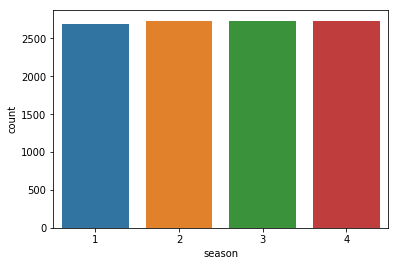

In [127]:
sns.countplot(data=train, x='season')

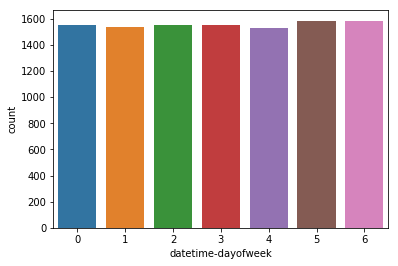

In [130]:
sns.countplot(data=train, x='datetime-dayofweek')

### 3.2 Barplot

In [128]:
import matplotlib.pyplot as plt

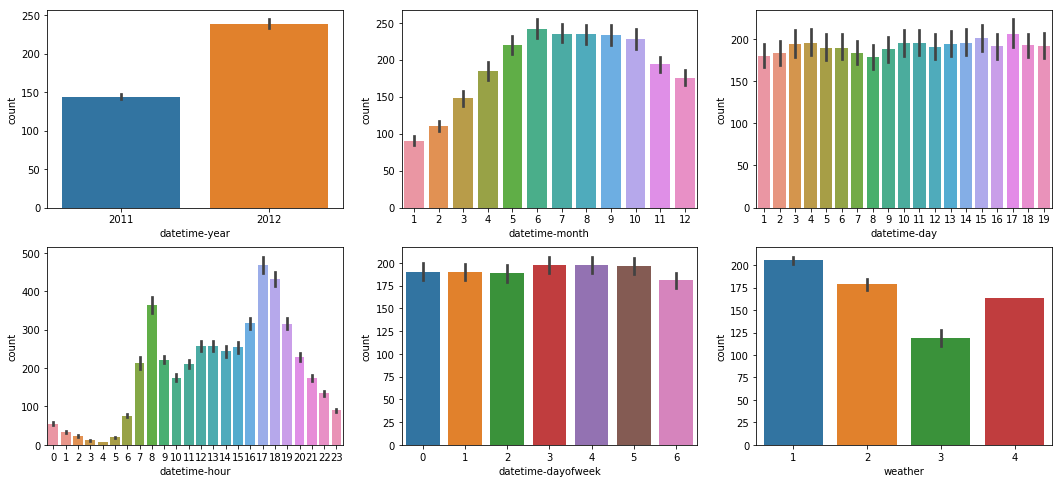

In [131]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)
sns.barplot(data=train, x='datetime-year', y='count', ax=ax1)
sns.barplot(data=train, x='datetime-month', y='count', ax=ax2)
sns.barplot(data=train, x='datetime-day', y='count', ax=ax3)
sns.barplot(data=train, x='datetime-hour', y='count', ax=ax4)
sns.barplot(data=train, x='datetime-dayofweek', y='count', ax=ax5)
sns.barplot(data=train, x='weather', y='count', ax=ax6)

In [101]:
# datetime-year와 datetime-month column을 합친 datetime-year-month 칼럼 만들어보기

train['datetime-year-month'] = train['datetime-year'].astype(str) + '-' + train['datetime-month'].astype(str)
# 데이터를 결합시켰다

train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek',
       'datetime-monday', 'datetime-tuesday', 'datetime-wedensday',
       'datetime-thursdayy', 'datetime-friday', 'datetime-saturday',
       'datetime-sunday', 'datetime-year-month', 'datetime-thursday'],
      dtype='object')

In [102]:
train.loc[:, ['datetime-year', 'datetime-month', 'datetime-year-month']]

,datetime-year,datetime-month,datetime-year-month
0,2011,1,2011-1
1,2011,1,2011-1
2,2011,1,2011-1
3,2011,1,2011-1
4,2011,1,2011-1
5,2011,1,2011-1
6,2011,1,2011-1
7,2011,1,2011-1
8,2011,1,2011-1
9,2011,1,2011-1


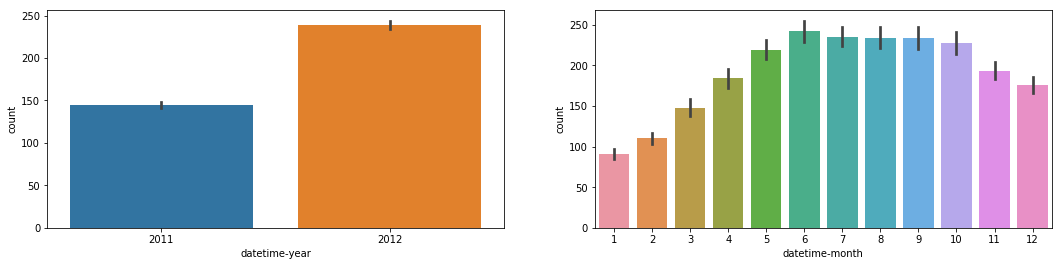

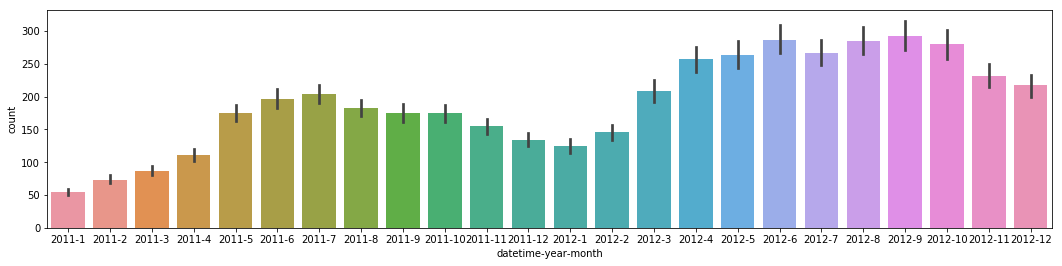

In [103]:
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(18, 4)

# 위에 그래프 2개는 위 코드를 통하여 만들어짐

sns.barplot(data = train, x = 'datetime-year', y = 'count', ax = ax1)
sns.barplot(data = train, x = 'datetime-month', y = 'count', ax = ax2)

figure, ax3 = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(18, 4)
sns.barplot(data = train, x = 'datetime-year-month', y = 'count', ax = ax3)

### 3.3 Pointplot

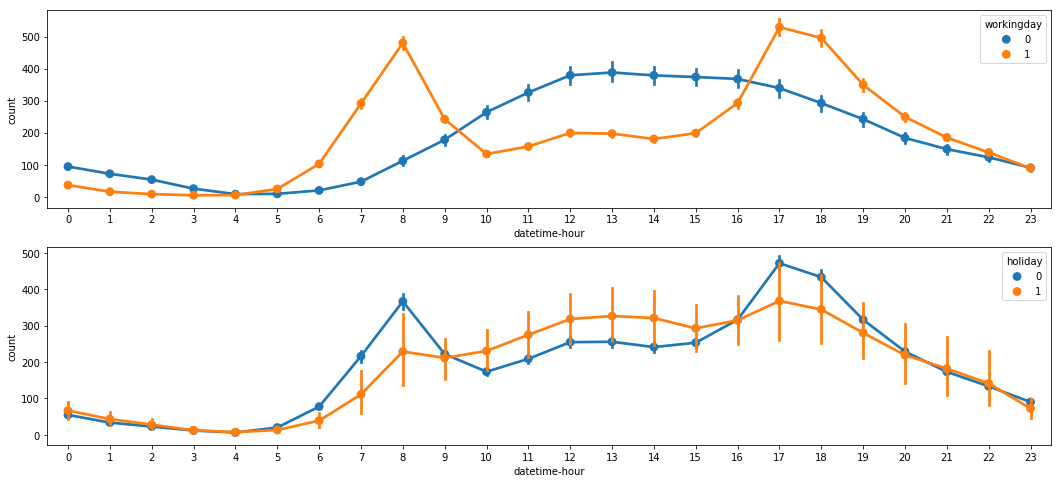

In [104]:
figure, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)
figure.set_size_inches(18, 8)

# 위에 그래프 2개는 위 코드를 통하여 만들어짐

sns.pointplot(data = train, x = 'datetime-hour', y = 'count', hue = 'workingday', ax = ax1)
sns.pointplot(data = train, x = 'datetime-hour', y = 'count', hue = 'holiday', ax = ax2)

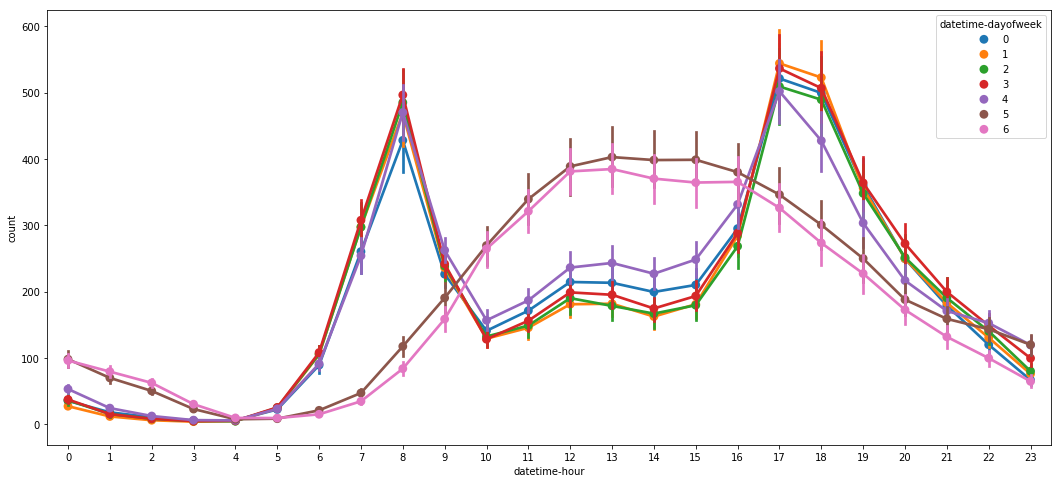

In [105]:
figure, ax1 = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(18, 8)
sns.pointplot(data = train, x = 'datetime-hour', y = 'count', hue = 'datetime-dayofweek')

### 3.4 Distplot

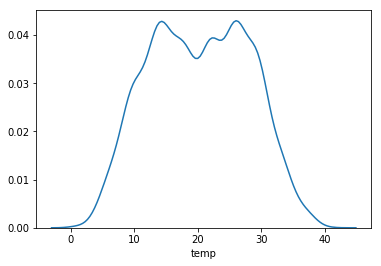

In [106]:
sns.distplot(train['temp'], hist= False)

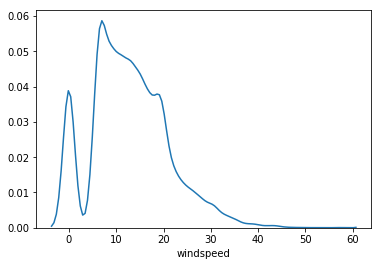

In [107]:
sns.distplot(train['windspeed'], hist= False)

### 4. Training & Predict

#### 4.1 훈련데이터, 테스트 데이터 생성

In [108]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek',
       'datetime-monday', 'datetime-tuesday', 'datetime-wedensday',
       'datetime-thursdayy', 'datetime-friday', 'datetime-saturday',
       'datetime-sunday', 'datetime-year-month', 'datetime-thursday'],
      dtype='object')

In [109]:
feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'datetime-year', 'datetime-hour', 'datetime-monday', 'datetime-tuesday', 'datetime-wedensday', 'datetime-thursdayy', 'datetime-friday', 'datetime-saturday', 'datetime-sunday']


feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-monday',
 'datetime-tuesday',
 'datetime-wedensday',
 'datetime-thursdayy',
 'datetime-friday',
 'datetime-saturday',
 'datetime-sunday']

In [111]:
# 훈련데이터 생성

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(10886, 17)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-monday,datetime-tuesday,datetime-wedensday,datetime-thursdayy,datetime-friday,datetime-saturday,datetime-sunday
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,False,False,False,False,False,True,False
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,False,False,False,False,False,True,False
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,False,False,False,False,False,True,False
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,False,False,False,False,False,True,False
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,False,False,False,False,False,True,False


In [112]:
# 테스트 데이터 생성

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(6493, 17)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-monday,datetime-tuesday,datetime-wedensday,datetime-thursdayy,datetime-friday,datetime-saturday,datetime-sunday
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,False,False,False,True,False,False,False
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,False,False,False,True,False,False,False
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,False,False,False,True,False,False,False
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,False,False,False,True,False,False,False
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,False,False,False,True,False,False,False


In [113]:
# 훈련데이터 Label(답)을 생성

label_name = 'count'
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

#### 4.2 학습하기
* Random Forest 알고리즘
* Random Forest는 여러개의 결정트리들을 인위적으로 학습하는 앙상블 학습방법

In [114]:
from sklearn.ensemble import RandomForestRegressor # 회귀분석 숫자예측

In [115]:
model = RandomForestRegressor(random_state = 37)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [116]:
# 학습하기

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [118]:
# 예측하기

predictions = model.predict(X_test)
print(predictions.shape)
predictions

(6493,)


array([ 10.3,   4.2,   3.2, ..., 121.7,  95.9,  43.7])

### 5. Submission

In [119]:
# sampleSubmisstion.csv load

submit = pd.read_csv('data/bike/sampleSubmission.csv')
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [120]:
submit['count'] = predictions
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,10.3
1,2011-01-20 01:00:00,4.2
2,2011-01-20 02:00:00,3.2
3,2011-01-20 03:00:00,3.6
4,2011-01-20 04:00:00,2.9


In [122]:
submit.to_csv('data/bike/bike_01.csv', index=False)

In [123]:
# 0.42840
# 0.47910

In [124]:
import numpy as np

train['log_count'] = np.log(train['count'] + 1)
train[['count', 'log_count']].head()

,count,log_count
0,16,2.833213
1,40,3.713572
2,32,3.496508
3,13,2.639057
4,1,0.693147


In [134]:
# log transformation 한 자전거 대여량(log_count)을 다시 exp() 함수로 원상복귀!

train['recover_count'] = np.exp(train['log_count']) - 1
train[['count', 'log_count', 'recover_count']].head()

,count,log_count,recover_count
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0


C:\Users\jason\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\jason\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\jason\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


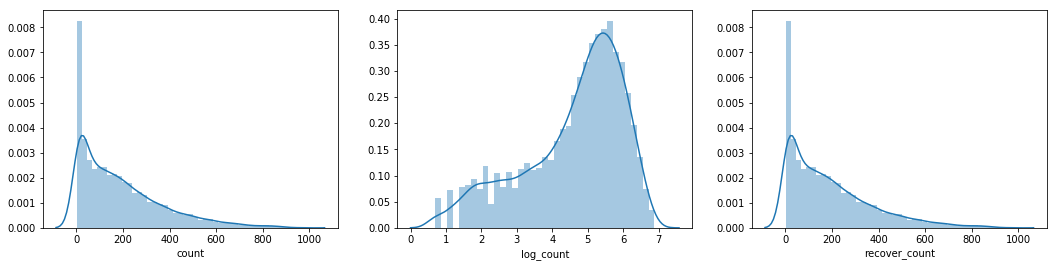

In [135]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)
figure.set_size_inches(18, 4)
sns.distplot(train['count'], ax = ax1)
sns.distplot(train['log_count'], ax = ax2)
sns.distplot(train['recover_count'], ax = ax3)